# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('demo01.csv')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [3]:
colunas_categoricas = df.select_dtypes(include=['object', 'bool']).columns

for coluna in colunas_categoricas:
    print(df[coluna].value_counts())
    print('---------------------------')


sexo
F    11201
M     5449
Name: count, dtype: int64
---------------------------
posse_de_veiculo
N    10178
Y     6472
Name: count, dtype: int64
---------------------------
posse_de_imovel
Y    11176
N     5474
Name: count, dtype: int64
---------------------------
tipo_renda
Working                 8565
Commercial associate    3826
Pensioner               2800
State servant           1451
Student                    8
Name: count, dtype: int64
---------------------------
educacao
Secondary / secondary special    11245
Higher education                  4551
Incomplete higher                  649
Lower secondary                    188
Academic degree                     17
Name: count, dtype: int64
---------------------------
estado_civil
Married                 11680
Single / not married     2035
Civil marriage           1283
Separated                 945
Widow                     707
Name: count, dtype: int64
---------------------------
tipo_residencia
House / apartment      14974
With

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável.
    Dica:
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis,
        3. conte o número de categorias dessa variável
        4. acumule essa informação de 3. na lista que você criou em 1.
        5. No final, essa lista pode ser atribuída à nossa variável.

In [4]:
#1
tipos_dados = df.dtypes
tipos_dados

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [5]:
df_tipos = pd.DataFrame({
    'Tipo de Dado': tipos_dados
})
df_tipos

,Tipo de Dado
sexo,object
posse_de_veiculo,object
posse_de_imovel,object
qtd_filhos,int64
tipo_renda,object
educacao,object
estado_civil,object
tipo_residencia,object
idade,float64
tempo_emprego,float64


In [6]:
#2)
qtd_categorias = []
for coluna in df.columns:
    qtd_categorias.append(df[coluna].nunique())

df_tipos['qtd_categorias'] = qtd_categorias
df_tipos

,Tipo de Dado,qtd_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


In [7]:
df['idade']

0        58.832877
1        52.356164
2        52.356164
3        46.224658
4        29.230137
           ...    
16645    54.109589
16646    43.389041
16647    30.005479
16648    30.005479
16649    33.936986
Name: idade, Length: 16650, dtype: float64

#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [8]:
colunas_qualitativas = df.select_dtypes(include=['object']).columns
colunas_qualitativas

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia'],
      dtype='object')

In [9]:
df_dummies = pd.get_dummies(df[colunas_qualitativas], drop_first=True)
df_dummies

,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y,tipo_renda_Pensioner,tipo_renda_State servant,tipo_renda_Student,tipo_renda_Working,educacao_Higher education,educacao_Incomplete higher,educacao_Lower secondary,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,True,True,True,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False
3,True,True,True,False,False,False,True,True,False,False,False,True,False,False,False,True,False,False,False,False
4,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False
16646,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False
16647,True,True,True,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False
16648,True,True,True,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False


In [10]:
colunas_numericas_booleanas = df.select_dtypes(include=['int64', 'float64', 'bool']).columns
df_numericas_booleanas = df[colunas_numericas_booleanas]

In [11]:
df_final = pd.concat([df[colunas_numericas_booleanas], df_dummies], axis=1)

df_final.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,True,True,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,True,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,True,False,False,False,True,False,False,False,False


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [12]:
tabela_cruzada = pd.crosstab(index=[df['possui_email'], df['posse_de_veiculo']], columns=df['mau'], margins=True, margins_name="Total")
tabela_cruzada

mau                            False  True  Total
possui_email posse_de_veiculo                    
0            N                  9108   233   9341
             Y                  5702   127   5829
1            N                   823    14    837
             Y                   627    16    643
Total                          16260   390  16650

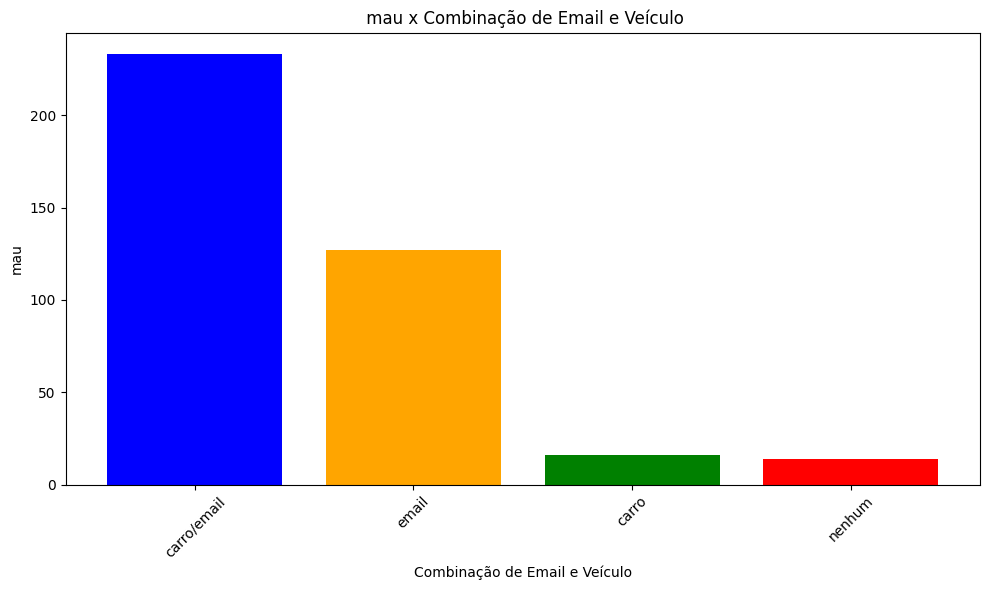

In [13]:

df['email_e_veiculo'] = df['possui_email'].astype(str) + ' e ' + df['posse_de_veiculo'].astype(str)

combinacoes_counts = df[df['mau'] == 1]['email_e_veiculo'].value_counts()

combinacoes_values = combinacoes_counts.values
categorias = ['carro/email', 'email', 'carro', 'nenhum']

plt.figure(figsize=(10, 6))
bars = plt.bar(categorias, combinacoes_values, color=['blue', 'orange', 'green', 'red'])

plt.xlabel('Combinação de Email e Veículo')
plt.ylabel('mau')
plt.title(' mau x Combinação de Email e Veículo')
plt.xticks(rotation=45)  # Rotacionar rótulos para melhor visualização
plt.tight_layout()
plt.show()


In [14]:

Aparentemente a melhor variavel para prever a probabilidade de mau = 1 e carro, uma vez que exestem mais ocorrencias entre quem possui somente email,
porem o dado nao parece ser de fato confiavel pois existe uma maior ocorrencia entre quem possui ambos. e aparentemente nao ter nenhum faz um bom...


SyntaxError: invalid syntax (3660714741.py, line 1)

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [16]:
df_final.to_csv('Mod07T1.csv', index=False)